# Pushing an image along a Hilbert curve 

This started out as a discussion with my son about enumerating  $\mathbb{N} \times \mathbb{N}$.

Cantor found a bijection $\mathbb{N} \rightarrow \mathbb{N} \times \mathbb{N}$.

Hilbert found a better bijection $\mathbb{N} \rightarrow \mathbb{N} \times \mathbb{N}$
which can be "rescaled" to give a continuous surjection  
$[0,1] \rightarrow  [0,1] \times [0,1].$
Note that the limit map is not injective.




http://www4.ncsu.edu/~njrose/pdfFiles/HilbertCurve.pdf

### The Holder exponent  


*Space-Filling Functions and Davenport Series*, 
Stéphane Jaffard and Samuel Nicolay, 
Recent Developments in Fractals and Related Fields, 19
Applied and Numerical Harmonic Analysis

Let $f: \Omega \subset \mathbb{R}^d \rightarrow \mathbb{R}^k$ 
    satisfies a Hölder condition, or is Hölder continuous, 
    when there are nonnegative real constants C, α, such that
$$ |f(x)-f(y)|\leq C\|x-y\|^{\alpha }$$
for all $x, y \in \Omega$. 

- Peano curves from $[0, 1]$ onto the square $ [0, 1]^2$
can be constructed to be 1/2–Hölder continuous. 

- It can be proved that when $ \alpha >{\tfrac {1}{2}}$
$ \alpha >{\tfrac {1}{2}}$  the image of a α–Hölder continuous function from the unit interval to the square cannot fill the square.



https://blog.zen.ly/geospatial-indexing-on-hilbert-curves-2379b929addc

older but better

http://blog.notdot.net/2009/11/Damn-Cool-Algorithms-Spatial-indexing-with-Quadtrees-and-Hilbert-Curves

related 

https://en.wikipedia.org/wiki/Hilbert_R-tree


and finally

https://www.americanscientist.org/article/crinkly-curves


In [3]:
import matplotlib.pyplot as plt
import numpy as np 

In [19]:
motif  = np.array([[0,1,1,0],[0,0,1,1]])

upper_left = np.flip(motif, axis = 0) + np.array([[0],[2]])
left_half = np.concatenate((motif,upper_left), axis =1)
right_half = np.array([[-1],[1]])*left_half + np.array([[3],[0]])
motif = np.concatenate((left_half , np.flip(right_half, axis = 1) ), axis =1)
motif = np.flip(motif, axis=0)

Let's take a look at the first portion of the curve
that goes through the 16 integer points in a 3x3 closed square

<IPython.core.display.Javascript object>


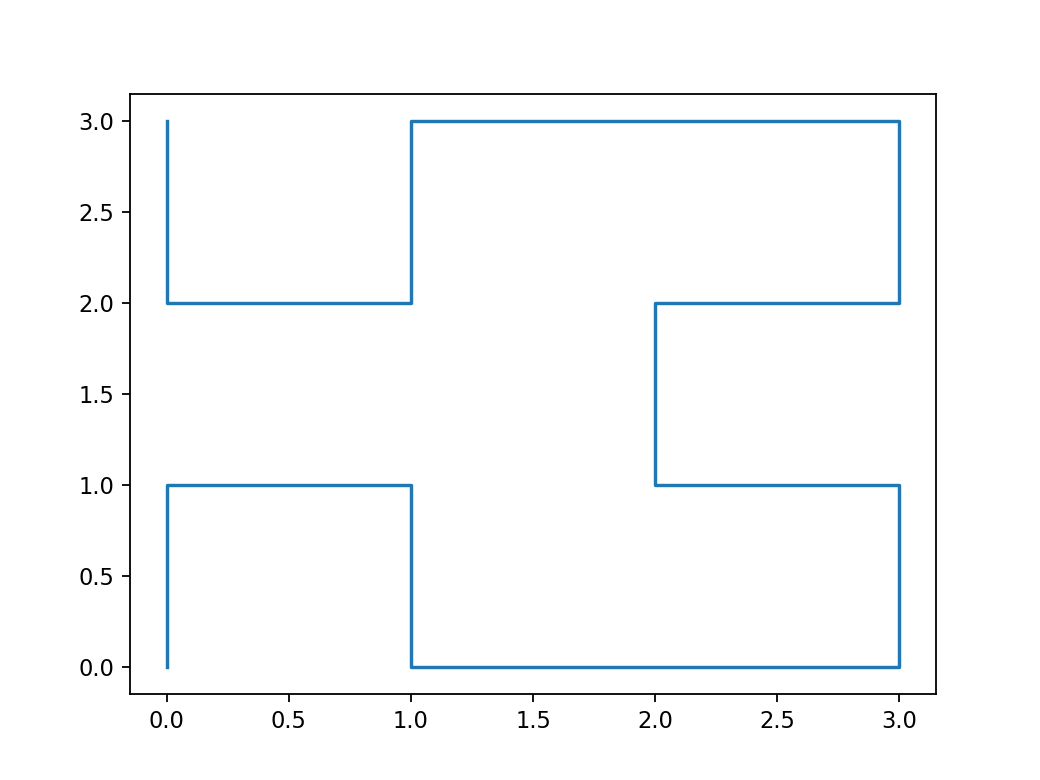

In [20]:
plt.plot(motif[0,:],motif[1,:])

This is a nicer version with a different axis order

<IPython.core.display.Javascript object>


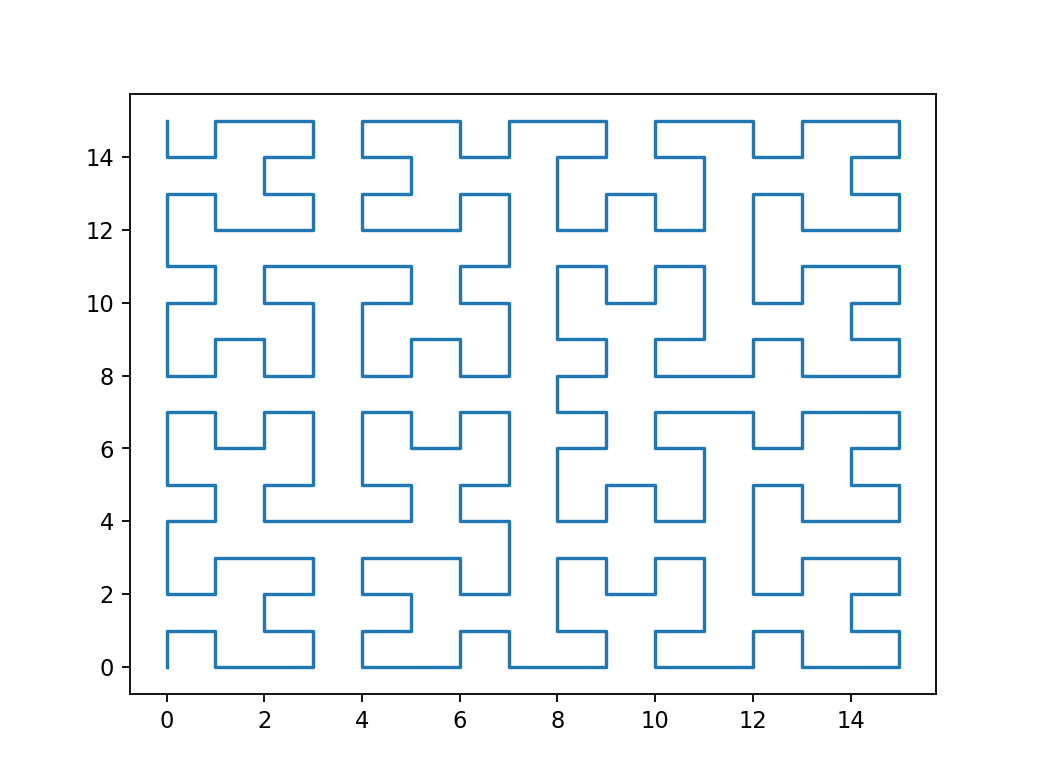

In [26]:
def hilbert_curve_pts(depth=3):

    motif  = np.array([[0,1,1,0],[0,0,1,1]])
    motif = motif.transpose()

    y_diff = np.array([0,1])
    x_diff = np.array([1,0])

    scale = 2

    #this is actually a recursion
    for _ in range(depth):
        #bit verbose but this how it is made
        #flip(_, axis=1)) is (x,y) -> (y,x)
        #flip(_, axis=0)) is a list.reverse()
        
        top_left_quad = np.flip( motif, axis=1) + scale*y_diff
        left_half = np.concatenate(( motif, top_left_quad), axis=0)
        right_half = np.array([-1,1])*left_half + (2*scale - 1)*x_diff

        motif = np.concatenate(( left_half, np.flip(right_half, axis=0) ), axis=0 )
        motif = np.flip( motif, axis=1)

        scale *= 2
    
    return motif

motif = hilbert_curve_pts(depth=3)
plt.plot(motif[:,0], motif[:,1])

In [5]:
import scipy as sp
import imageio 

/usr/local/conda3/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/conda3/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


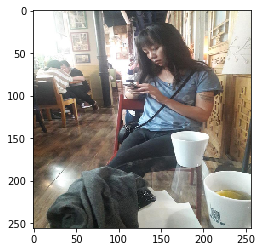

In [6]:
im = imageio.imread('zhu.jpg')
from skimage.transform import resize
rr = resize(im,(256,256))
plt.imshow(rr)

In [7]:
flat_indices = np.dot(hilbert_curve_pts(depth=7), np.array([1,256]) )

<IPython.core.display.Javascript object>


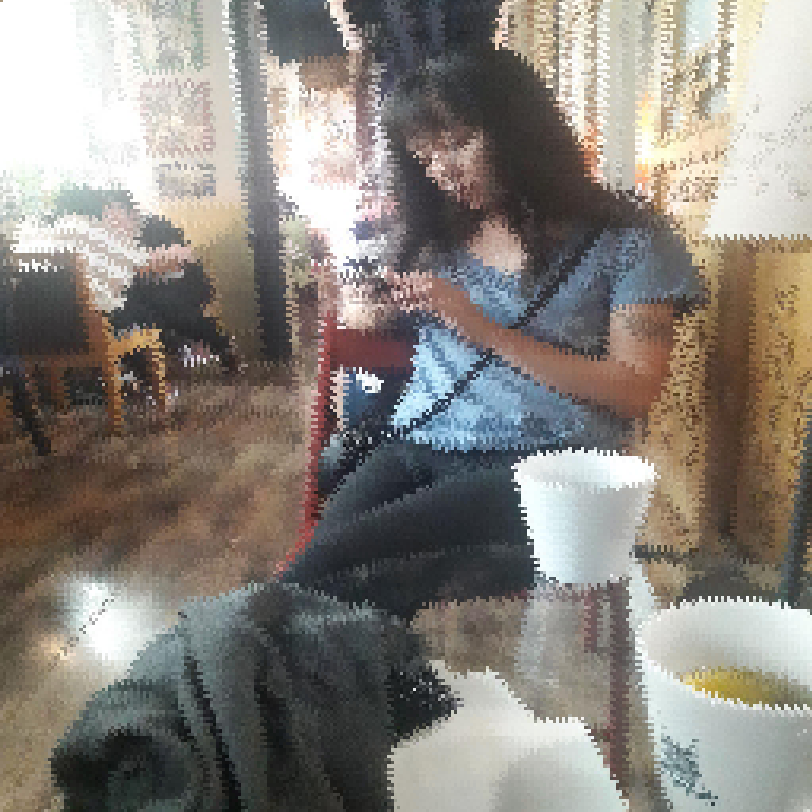

In [35]:
def curve_shift(src_im, 
         dx=-8):

    mapper  = np.stack((flat_indices, np.roll(flat_indices, dx)), 
                        axis = 1 ) 
    
    mapper.view('i8,i8').sort(
        order=['f0'], 
        axis=0)
    
    index_mapper = mapper[:,1]
    
    new_im = np.ones_like(src_im)
    for k, col in enumerate(src_im.transpose()):
        col = col.flatten(order='F')
        new_im[:,:,k] = np.reshape( col[index_mapper], (256,256))
        
    return new_im



f = plt.figure(frameon=False, figsize=(5, 5), dpi=100)
canvas_width, canvas_height = f.canvas.get_width_height()
ax = f.add_axes([0, 0, 1, 1])
ax.axis('off')
rt = plt.imshow(curve_shift(rr, dx= 1 ))

## Animation

 This was trickier than it should have been
 I suppose it is because the Jupyter "platform"
 has been going through a lot of change.
 
 THe code in the end is less than 20 lines.
 
 1. Import and  set up for animation using %matplotlib notebook
 1. Set up the canvas element.
 1. Write the callbacks for the animation loop
 1. Instantiate the loop using animation.FuncAnimation()

In [36]:
from matplotlib import animation, rc
from IPython.display import HTML

# I found this on youtube images are no longer static
%matplotlib notebook

<IPython.core.display.Javascript object>


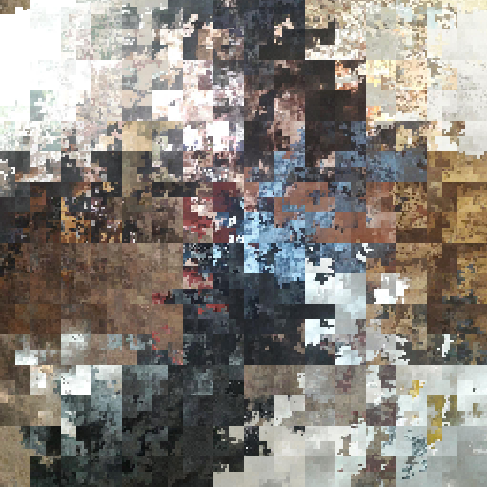

In [31]:
# First set up the figure, the axis, and the plot element we want to animate
# see also https://matplotlib.org/examples/animation/dynamic_image.html

f = plt.figure(frameon=False, figsize=(3, 3), dpi=100)
canvas_width, canvas_height = f.canvas.get_width_height()
ax = f.add_axes([0, 0, 1, 1])
ax.axis('off')

rt = plt.imshow( curve_shift(rr, dx= 0 ), animated=True)

In [28]:
# initialization function: plot the background of each frame
def init():
    pass

# animation function. This is called sequentially
def updatefig(frame_no):
    rt.set_data(curve_shift(rr, dx= frame_no))
    return rt,

In [32]:
anim = animation.FuncAnimation(f, updatefig, frames=512, 
                                  interval=2, blit=True)
